In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

train = pd.read_csv(r'N:\MINOR PROJECT\train_1.csv').fillna(0)
train.head(5)




,Page,01-07-2015,02-07-2015,03-07-2015,04-07-2015,05-07-2015,06-07-2015,07-07-2015,08-07-2015,09-07-2015,...,22-12-2016,23-12-2016,24-12-2016,25-12-2016,26-12-2016,27-12-2016,28-12-2016,29-12-2016,30-12-2016,31-12-2016
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 31-12-2016
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [3]:
import re

def spliturl(url):
    ob=re.search('(.*)\_(.*).wikipedia.org\_(.*)\_(.*)',url)
    if ob :
        return ob.group(2)
    else:
        return 'na'
print(spliturl('Elon_Musk_fr.wikipedia.org_desktop_all-agents'))

train['lang'] = train.Page.map(spliturl)


fr


In [4]:
page_details = train.Page.str.extract(r'(?P<topic>.*)\_(?P<lang>.*).wikipedia.org\_(?P<access>.*)\_(?P<type>.*)')

page_details[0:50]


,topic,lang,access,type
0,2NE1,zh,all-access,spider
1,2PM,zh,all-access,spider
2,3C,zh,all-access,spider
3,4minute,zh,all-access,spider
4,52_Hz_I_Love_You,zh,all-access,spider
5,5566,zh,all-access,spider
6,91Days,zh,all-access,spider
7,A'N'D,zh,all-access,spider
8,AKB48,zh,all-access,spider
9,ASCII,zh,all-access,spider


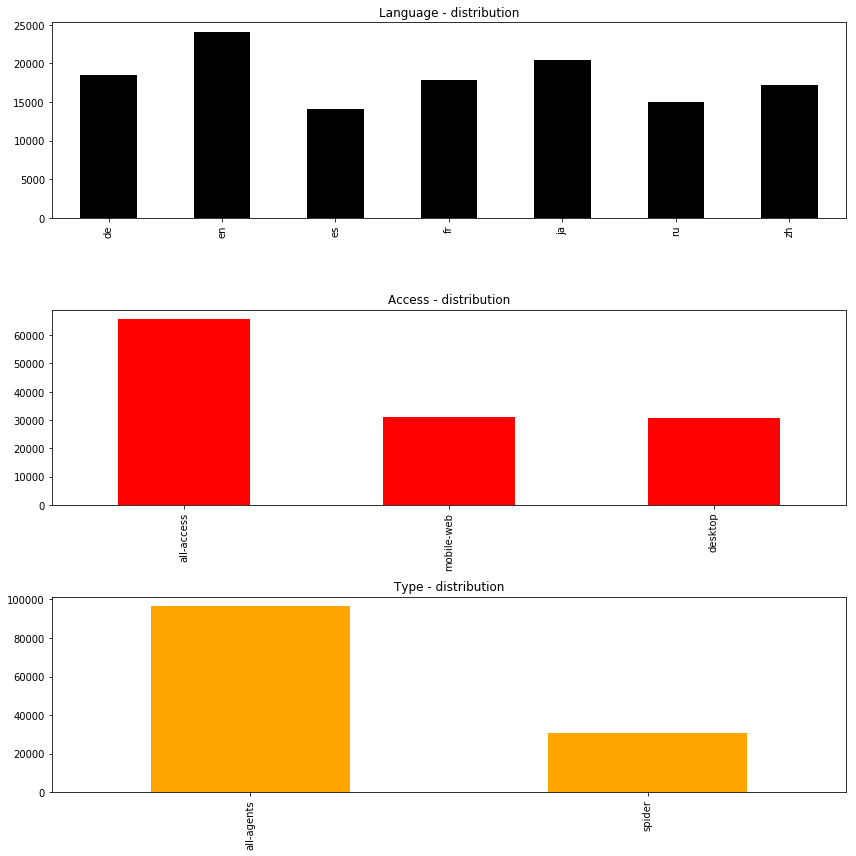

In [5]:
fig, axs  = plt.subplots(3,1,figsize=(12,12))

page_details["lang"].value_counts().sort_index().plot.bar(ax=axs[0],color='black')
axs[0].set_title('Language - distribution')

page_details["access"].value_counts().plot.bar(ax=axs[1],color='red')
axs[1].set_title('Access - distribution')

page_details["type"].value_counts().plot.bar(ax=axs[2],color='orange')
axs[2].set_title('Type - distribution')

plt.tight_layout()

In [6]:
lang_sets = {}
lang_sets['en'] = train[train.lang=='en'].iloc[:,0:-1]

lang_sets['ja'] = train[train.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train[train.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train[train.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train[train.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train[train.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train[train.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train[train.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

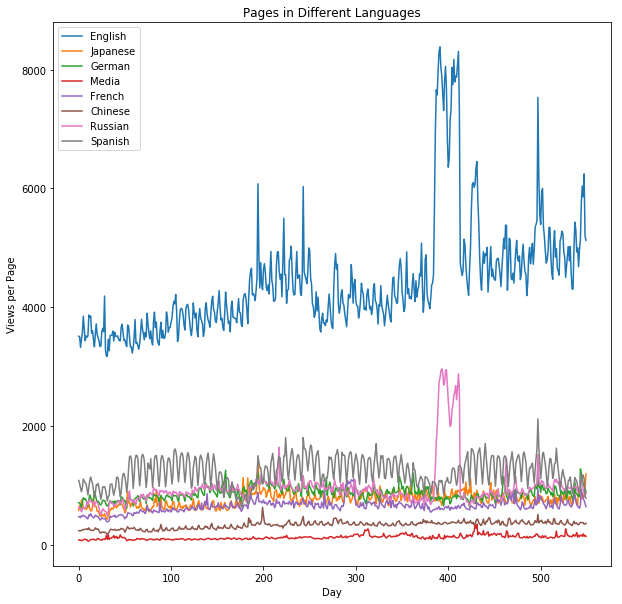

In [7]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

en
                                                   Page         total
38573  Main_Page_en.wikipedia.org_all-access_all-agents  1.206618e+10



ja
                                                 Page        total
120336  メインページ_ja.wikipedia.org_all-access_all-agents  210753795.0



de
                                                     Page         total
139119  Wikipedia:Hauptseite_de.wikipedia.org_all-acce...  1.603934e+09



na
                                                    Page       total
45071  Special:Search_commons.wikimedia.org_all-acces...  67150638.0



fr
                                                    Page        total
27330  Wikipédia:Accueil_principal_fr.wikipedia.org_a...  868480667.0



zh
                                                    Page        total
28727  Wikipedia:首页_zh.wikipedia.org_all-access_all-a...  123694312.0



ru
                                                    Page         total
99322  Заглавная_страница_ru.wikipedia.org_all-access.

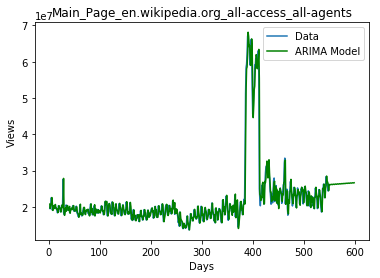

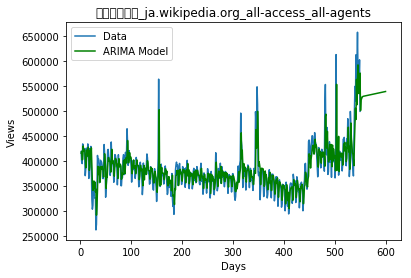

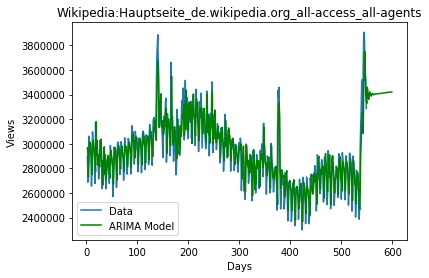

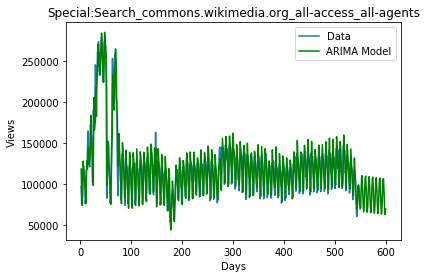

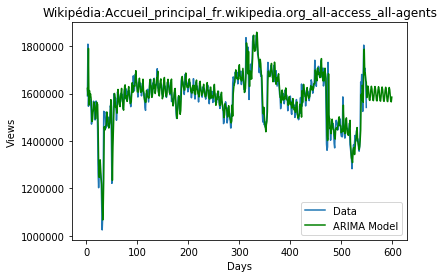

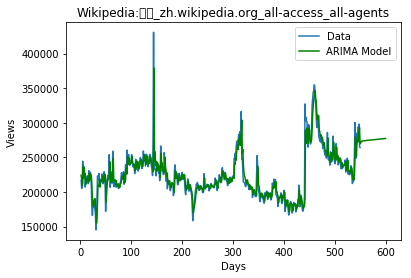

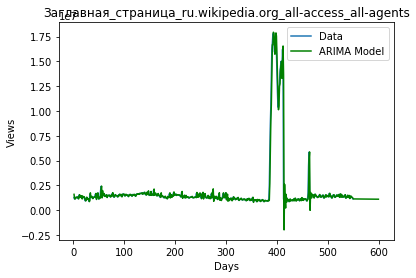

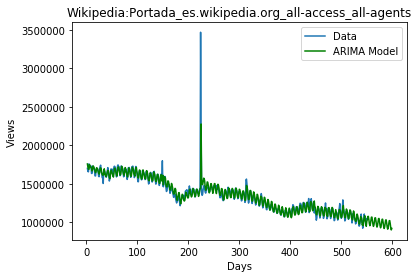

In [8]:


npages = 5
top_pages = {}
for key in lang_sets:
    print(key)
    sum_set = pd.DataFrame(lang_sets[key][['Page']])
    sum_set['total'] = lang_sets[key].sum(axis=1)
    sum_set = sum_set.sort_values('total',ascending=False)
    print(sum_set.head(1))
    top_pages[key] = sum_set.index[0]
    print('\n\n')





from statsmodels.tsa.arima_model import ARIMA
import warnings

cols = train.columns[1:-1]
for key in top_pages:
    data = np.array(train.loc[top_pages[key],cols],'f')
    result = None
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        try:
            arima = ARIMA(data,[2,1,4])
            result = arima.fit(disp=False)
        except:
            try:
                arima = ARIMA(data,[2,1,2])
                result = arima.fit(disp=False)
            except:
                print(train.loc[top_pages[key],'Page'])
                print('\tARIMA failed')
    #print(result.params)
    pred = result.predict(2,599,typ='levels')
    x = [i for i in range(600)]
    i=0

    plt.plot(x[2:len(data)],data[2:] ,label='Data')
    plt.plot(x[2:],pred,label='ARIMA Model',color='green')
    plt.title(train.loc[top_pages[key],'Page'])
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.legend()
    plt.show()


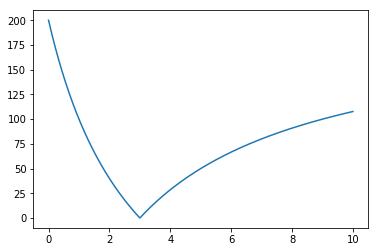

In [9]:
import seaborn as sns
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.nanmean(diff)
y_true = np.array(3)
y_pred = np.ones(1)
x = np.linspace(0,10,1000)
res = [smape(y_true, i * y_pred) for i in x]
plt.plot(x, res)

SMAPE min:80.00  at 9.00
SMAPE is :95.24  at median 5.00


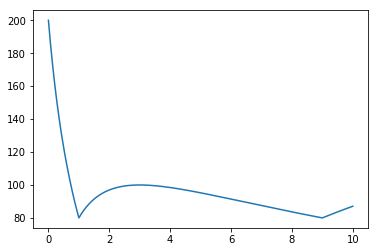

In [10]:
y_true = np.array([1,9])
y_pred = np.ones(len(y_true))
x = np.linspace(0,10,1000)
res = [smape(y_true, i * y_pred) for i in x]
plt.plot(x, res)
print('SMAPE min:%0.2f' % np.min(res), ' at %0.2f' % x[np.argmin(res)])
print('SMAPE is :%0.2f' % smape(y_true, y_pred*np.nanmedian(y_true)), 
      ' at median %0.2f' % np.nanmedian(y_true))


In [2]:

%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
N = 60 # number of days for test split
i = 1800 # one example time series to train



print(data.tail())
X = pd.DataFrame(index=range(0,len(data)))
X['ds'] = data.index
X['y'] = data['visits'].values
X.tail()
m = Prophet(yearly_seasonality=True)
m.fit(X)
future = m.make_future_dataframe(periods=N)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
m.plot(forecast);


NameError: name 'data' is not defined

In [ ]:
m.plot_components(forecast)
